# Women's basketball analysis 

### Reading in data ###

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("WBB.xlsx").dropna(axis='index', how='all')
df = df.reset_index(drop=True)

df

,Name,Accumulated Acceleration Load,Accumulated Acceleration Load / min,Acceleration Load (load | ‚â• 79%),Description,Group Id,Group name,League ID,Player ID,Types,Phase begin date (UTC),Phase end date (UTC),Time (s),Phase ID
0,Kayla McPherson,NaN,NaN,NaN,NaN,3.0,RTP,NaN,9.0,POSITIONAL,2022-12-28,2022-12-28,836.0,1834.0
1,Kayla McPherson,NaN,NaN,NaN,3x44's,1.0,Group A,NaN,9.0,CONDITIONING,2022-12-28,2022-12-28,418.0,1835.0
2,Alexandra Zelaya,39.94,8.12,0.00,NaN,5.0,Group E,NaN,2.0,POSITIONAL,2022-12-28,2022-12-28,295.0,1836.0
3,Alyssa Utsby,37.06,7.54,3.41,NaN,4.0,Group D,NaN,3.0,POSITIONAL,2022-12-28,2022-12-28,295.0,1836.0
4,Kennedy Todd-Williams,39.70,8.08,11.48,NaN,4.0,Group D,NaN,5.0,POSITIONAL,2022-12-28,2022-12-28,295.0,1836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,Destiny Adams,45.65,7.38,5.80,NaN,5.0,Group E,NaN,10.0,Q4,2023-01-15,2023-01-15,371.0,1983.0
1444,Malu Tshitenge,0.00,NaN,NaN,NaN,5.0,Group E,NaN,11.0,Q4,2023-01-15,2023-01-15,0.0,1983.0
1445,Deja Kelly,143.23,10.30,41.92,NaN,4.0,Group D,NaN,13.0,Q4,2023-01-15,2023-01-15,834.0,1983.0
1446,Anya Poole,0.00,NaN,NaN,NaN,5.0,Group E,NaN,15.0,Q4,2023-01-15,2023-01-15,0.0,1983.0


### Subset with only game (Q1-Q4) data ###

In [2]:
game_df = df[df['Types'].isin(['Q1', 'Q2', 'Q3', 'Q4'])]
game_df = game_df.reset_index(drop=True)
game_df.head(50)

,Name,Accumulated Acceleration Load,Accumulated Acceleration Load / min,Acceleration Load (load | ‚â• 79%),Description,Group Id,Group name,League ID,Player ID,Types,Phase begin date (UTC),Phase end date (UTC),Time (s),Phase ID
0,Alexandra Zelaya,0.00,NaN,NaN,NaN,5.0,Group E,NaN,2.0,Q1,2022-12-30,2022-12-30,0.0,1852.0
1,Alyssa Utsby,260.16,13.99,67.17,NaN,4.0,Group D,NaN,3.0,Q1,2022-12-30,2022-12-30,1116.0,1852.0
2,Kennedy Todd-Williams,263.93,14.88,81.11,NaN,4.0,Group D,NaN,5.0,Q1,2022-12-30,2022-12-30,1064.0,1852.0
3,Eva Hodgson,227.85,12.22,55.99,NaN,4.0,Group D,NaN,6.0,Q1,2022-12-30,2022-12-30,1119.0,1852.0
4,Ariel Young,0.00,NaN,NaN,NaN,4.0,Group D,NaN,7.0,Q1,2022-12-30,2022-12-30,0.0,1852.0
5,Teonni Key,94.99,9.55,18.47,NaN,5.0,Group E,NaN,8.0,Q1,2022-12-30,2022-12-30,597.0,1852.0
6,Destiny Adams,12.39,10.78,1.20,NaN,5.0,Group E,NaN,10.0,Q1,2022-12-30,2022-12-30,69.0,1852.0
7,Malu Tshitenge,0.00,NaN,NaN,NaN,5.0,Group E,NaN,11.0,Q1,2022-12-30,2022-12-30,0.0,1852.0
8,Deja Kelly,231.00,12.39,73.08,NaN,4.0,Group D,NaN,13.0,Q1,2022-12-30,2022-12-30,1119.0,1852.0
9,Anya Poole,45.92,4.21,12.65,NaN,5.0,Group E,NaN,15.0,Q1,2022-12-30,2022-12-30,655.0,1852.0


### Add **Game Total** row to `game_df` ###

In [3]:
dates = game_df['Phase begin date (UTC)'].unique()
names = game_df['Name'].unique()


for date in dates:
    AALs = []
    for name in names:
        AAL_sum = game_df.loc[(game_df['Phase begin date (UTC)'] == date) & (game_df['Name'] == name), 'Accumulated Acceleration Load'].replace(0, np.nan).sum()
        AAL_max = game_df.loc[(game_df['Phase begin date (UTC)'] == date) & (game_df['Name'] == name), 'Accumulated Acceleration Load'].replace(0, np.nan).max()
        AAL_min = game_df.loc[(game_df['Phase begin date (UTC)'] == date) & (game_df['Name'] == name), 'Accumulated Acceleration Load'].replace(0, np.nan).min()
        if AAL_sum >= 0.00000001:
            AALs.append(AAL_sum)
        row = ({
            'Name': name,
            'Types': 'Game',
            'Phase begin date (UTC)': date,
            'Phase end date (UTC)': date,
            'Game Total': AAL_sum,
            'Game Max': AAL_max,
            'Game Min': AAL_min
        })
        df2 = pd.DataFrame(row, index=[len(game_df)])
        game_df = pd.concat([game_df, df2])
    row = ({
        'Name': 'Team',
        'Types': 'Game',
        'Phase begin date (UTC)': date,
        'Phase end date (UTC)': date,
        'Game Total': sum(AALs) / len(AALs)
    })
    df2 = pd.DataFrame(row, index=[len(game_df)])
    game_df = pd.concat([game_df, df2])
game_df = game_df.sort_values(['Phase begin date (UTC)', 'Phase ID']).drop_duplicates()
game_df.tail(60)
    
    

,Name,Accumulated Acceleration Load,Accumulated Acceleration Load / min,Acceleration Load (load | ‚â• 79%),Description,Group Id,Group name,League ID,Player ID,Types,Phase begin date (UTC),Phase end date (UTC),Time (s),Phase ID,Game Total,Game Max,Game Min
300,Ariel Young,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,0.000000,NaN,NaN
301,Teonni Key,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,187.220000,93.43,45.02
302,Destiny Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,365.380000,182.84,41.43
303,Malu Tshitenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,0.000000,NaN,NaN
304,Deja Kelly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,1006.500000,300.55,201.43
305,Anya Poole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,589.660000,211.50,87.35
306,Paulina Paris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,687.150000,267.02,76.17
307,Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Game,2023-01-13,2023-01-13,NaN,NaN,613.578889,NaN,NaN
196,Alexandra Zelaya,0.00,NaN,NaN,NaN,5.0,Group E,NaN,2.0,Q1,2023-01-15,2023-01-15,0.0,1979.0,NaN,NaN,NaN
197,Alyssa Utsby,219.59,14.97,61.05,NaN,4.0,Group D,NaN,3.0,Q1,2023-01-15,2023-01-15,880.0,1979.0,NaN,NaN,NaN


### Plot most recent game ###

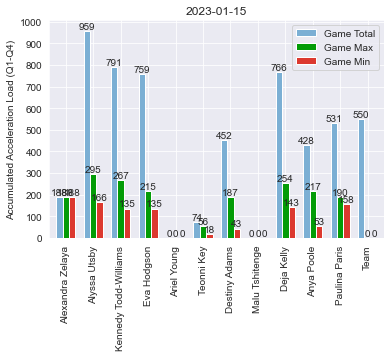

In [4]:
recent = game_df.loc[(game_df['Phase begin date (UTC)'] == dates[-1]) & (game_df['Types'] == 'Game'), ['Name', 'Game Total', 'Game Max', 'Game Min']].round()
recent = recent.set_index('Name')

sns.set_style('darkgrid')
fig = recent.plot.bar(color={'Game Total': '#7BAFD4', 'Game Max': '#039C07', 'Game Min': '#DC392F'}, grid=True, width=.7, linewidth=1)

plt.title(str(dates[-1])[0:10])
plt.xlabel('')
plt.ylabel('Accumulated Acceleration Load (Q1-Q4)')
plt.yticks(range(0, int(recent['Game Total'].max()) + 100, 100))

for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])


### Add  **season total** row to `game_df` ###

In [5]:
names = list(names)
names.append('Team')
for name in names:
    season_avg = game_df.loc[game_df['Name'] == name, 'Game Total'].mean()
    row = ({
        'Name': name,
        'Types': 'Season',
        'Season Average': season_avg
    })
    df2 = pd.DataFrame(row, index=[len(game_df)])
    game_df = pd.concat([game_df, df2])
game_df = game_df.sort_values(['Phase begin date (UTC)', 'Phase ID']).drop_duplicates()

game_df.tail(60)

,Name,Accumulated Acceleration Load,Accumulated Acceleration Load / min,Acceleration Load (load | ‚â• 79%),Description,Group Id,Group name,League ID,Player ID,Types,Phase begin date (UTC),Phase end date (UTC),Time (s),Phase ID,Game Total,Game Max,Game Min,Season Average
200,Teonni Key,17.69,16.08,4.56,NaN,5.0,Group E,NaN,8.0,Q1,2023-01-15,2023-01-15,66.0,1979.0,NaN,NaN,NaN,NaN
201,Destiny Adams,43.13,16.48,11.20,NaN,5.0,Group E,NaN,10.0,Q1,2023-01-15,2023-01-15,157.0,1979.0,NaN,NaN,NaN,NaN
202,Malu Tshitenge,0.00,NaN,NaN,NaN,5.0,Group E,NaN,11.0,Q1,2023-01-15,2023-01-15,0.0,1979.0,NaN,NaN,NaN,NaN
203,Deja Kelly,254.32,14.74,103.32,NaN,4.0,Group D,NaN,13.0,Q1,2023-01-15,2023-01-15,1035.0,1979.0,NaN,NaN,NaN,NaN
204,Anya Poole,217.42,13.55,66.62,NaN,5.0,Group E,NaN,15.0,Q1,2023-01-15,2023-01-15,963.0,1979.0,NaN,NaN,NaN,NaN
205,Paulina Paris,0.00,NaN,NaN,NaN,4.0,Group D,NaN,18.0,Q1,2023-01-15,2023-01-15,0.0,1979.0,NaN,NaN,NaN,NaN
206,Alexandra Zelaya,0.00,NaN,NaN,NaN,5.0,Group E,NaN,2.0,Q2,2023-01-15,2023-01-15,0.0,1980.0,NaN,NaN,NaN,NaN
207,Alyssa Utsby,166.46,15.30,49.32,NaN,4.0,Group D,NaN,3.0,Q2,2023-01-15,2023-01-15,653.0,1980.0,NaN,NaN,NaN,NaN
208,Kennedy Todd-Williams,206.47,13.48,53.32,NaN,4.0,Group D,NaN,5.0,Q2,2023-01-15,2023-01-15,919.0,1980.0,NaN,NaN,NaN,NaN
209,Eva Hodgson,135.11,9.79,22.56,NaN,4.0,Group D,NaN,6.0,Q2,2023-01-15,2023-01-15,828.0,1980.0,NaN,NaN,NaN,NaN


### Plot season averages ###

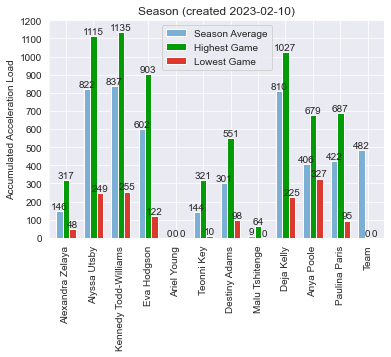

In [6]:
season = game_df.copy()

if 'Team' in names:
    names.pop()

season = game_df.loc[game_df['Types'] == 'Season', ['Name', 'Season Average']]

for name in names:
    season.loc[season['Name'] == name, 'Highest Game'] = game_df.loc[(game_df['Name'] == name) & (game_df['Types'] == 'Game'), 'Game Total'].replace(0, np.nan).max()
    season.loc[season['Name'] == name, 'Lowest Game'] = game_df.loc[(game_df['Name'] == name) & (game_df['Types'] == 'Game'), 'Game Total'].replace(0, np.nan).min()
season = season.set_index('Name').round()    

sns.set_style('darkgrid')
fig = season.plot.bar(color={'Season Average': '#7BAFD4', 'Highest Game': '#039C07', 'Lowest Game': '#DC392F'}, grid=True, width=.7, linewidth=1)

today = np.datetime64('today', 'D')

plt.title(f'Season (created {today})')
plt.xlabel('')
plt.ylabel('Accumulated Acceleration Load')
plt.yticks(range(0, int(season['Highest Game'].max()) + 100, 100))

for i in range(len(fig.containers)):
    fig.bar_label(fig.containers[i])